In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# **Glosary**

* ID: ID number of customers.
* Warehouse block: The company has a big warehouse that is divided into blocks (A-E).
* Mode of shipment: The company ships the products in multiple ways (Ship, Flight, and Road).
* Customer care calls: The number of calls made from inquiries for inquiries of the shipment.
* Customer rating: Rate from each customer. 1 is the lowest, and 5 is the highest.
* Cost of the product: Cost of the product in US Dollars.
* Prior purchases: The number of previous purchases.
* Product importance: The company has categorized the product in various parameters (low, medium, high).
* Gender: Male and female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: The weight in grams.
* Reached on time: 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on time.

# **Data Understanding and Cleaning**

## Calling the Data

In [2]:
df=pd.read_csv('Online Retail Shipping.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Data Understanding

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [5]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Warehouse_block,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,3,"[Flight, Ship, Road]"
3,Customer_care_calls,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, 164, 189, 232, 198, 275, 152, 227, 143, 239, 145, 161, 156, 211, 251, 225, 172, 234, 266, 257, 223, 149, 137, 181, 215, 269, 139, 174, 151, 210, 169, 160, 190, 141, 165, 170, 203, 246, 238, 193, 221, 179, 105, 261, 202, 109, 158, 231, 206, 187, 230, 113, 180, 132, 217, 197, 185, 278, 229, 186, 286, 175, 219, 213, 235, 271, 144, 218, 263, 168, 265, 205, 252, 222, 220, 147, 200, 224, 247, 280, 157, 207, 237, 264, 248, 191, 146, 135, 98, 97, 114, 112, ...]"
6,Prior_purchases,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,3,"[low, medium, high]"
8,Gender,2,"[F, M]"
9,Discount_offered,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43, 45, 6, 36, 18, 38, 51, 2, 28, 24, 31, 61, 22, 4, 62, 16, 56, 15, 9, 40, 37, 41, 17, 64, 52, 49, 39, 14, 33, 21, 13, 23, 26, 57, 7, 35, 8, 5, 53, 55, 47, 65, 25, 50, 60, 20, 19, 63, 58, 34, 54, 27, 42, 30]"


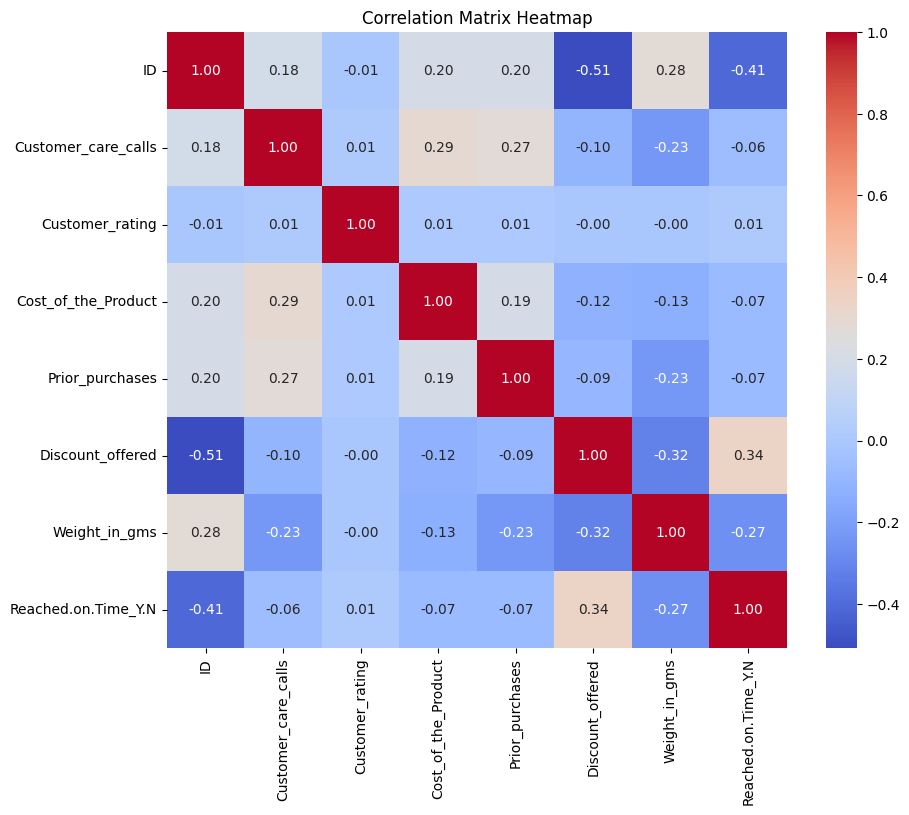

In [6]:
# Assuming your dataset is stored in a DataFrame called 'df'
correlation_matrix = df.corr('spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Data Cleaning

### MISSING VALUE

In [7]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

In [8]:
df.isnull().sum()/df.shape[0]*100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

### CHECK DUPLICATE

In [9]:
data_duplicate= df[df.duplicated(subset=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 
                                         'Prior_purchases','Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
                                         'Reached.on.Time_Y.N'])]
display(data_duplicate)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [10]:
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


### CHECK OUTLIERS

<Axes: xlabel='Weight_in_gms'>

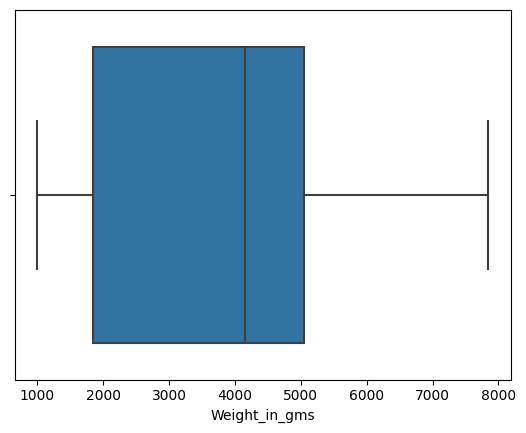

In [11]:
sns.boxplot(x=df['Weight_in_gms'])

In [12]:
Q1 = df['Weight_in_gms'].quantile(0.25)
Q3 = df['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Weight_in_gms'] < (Q1 - 1.5 * IQR)) | (df['Weight_in_gms'] > (Q3 + 1.5 * IQR))]
print(f'hasil dari Q1 adalah: {Q1}')
print(f'hasil dari Q3 adalah: {Q3}')
display(outliers)


hasil dari Q1 adalah: 1839.5
hasil dari Q3 adalah: 5050.0


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


## **Problem To Solve**

### Reached on time Y.N

In [13]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

# Findings
* The Online Retail Shipping dataset contains 12 columns and 10,999 rows
* There are no columns that contain NaN values
* The ID column represents the customer identification number, which is an integer, and all of its values are unique, meaning there are no duplicate values
* Only the Warehouse_block, Mode_of_shipment, Product of importance, and Gender columns are object type columns
* Apart from the columns mentioned above, all other columns are integer type
* Although there are many integer columns, some columns can be defined because they contain a code such as the Customer_rating and Reached.on.Time_Y.N columns
* Not much of the correlation that above 0.05, therefore most of the analytics will be done in descriptive analytics.
* After checking using isna() and isnull(), there are no null or NaN values in the Online Retail Shipping data
* No duplicate data found after checking using .duplicated()
* No outliers were detected after checking using IQR
* Specifically, out of **10,999** orders, **6,563** were labeled as '1', indicating they were not delivered on time, representing **more than half of all orders.** 

# **DATA ANALYSIS**

Following the completion of the data understanding and cleaning process, we'll now delve into understanding **why more than half of the products are not reaching their destinations on time**.

In the realm of shipping, the ETA (Estimated Time of Arrival) is critical. Even a single day's delay in shipment can trigger a domino effect on subsequent processes such as production, selling, and utilization. Therefore, timely arrivals are paramount in the shipping industry.

However, multiple variables can impact the shipping process, such as the procedures within the warehouse. Processes like sorting, picking, and loading can influence the delivery timeline. If these operations are delayed, the initiation of the shipment delivery could be postponed. Consequently, the cause of products not reaching on time isn't exclusively tied to the shipping process.

Our analysis will involve comparing the data in the 'Reached_on_Time' column with other parameters. We chose this column for further scrutiny due to the substantial number of instances where the product was not delivered on time.Now that our data is thoroughly cleaned, it is safe to proceed with the data analysis process. In this analysis, our primary stakeholder is the **Transport Manager**.

## Mode of Shipment

The mode of shipment can impact the on-time delivery of products due to speed since different modes of shipment (air, ground, sea) have varying transit time, route flexibility because some modes, like road transport, can adapt to changes more flexibly than ships or planes.
Therefore choosing the appropriate mode of shipment based on product and destination specifics is crucial for timely delivery.

In [14]:
df_ct1=pd.crosstab(df['Mode_of_Shipment'],df['Reached.on.Time_Y.N'])
df_ct1['Total']=df_ct1.sum(axis=1)
df_ct1.sort_values('Total',ascending=False)

Reached.on.Time_Y.N,0,1,Total
Mode_of_Shipment,,,
Ship,3003,4459,7462
Flight,708,1069,1777
Road,725,1035,1760


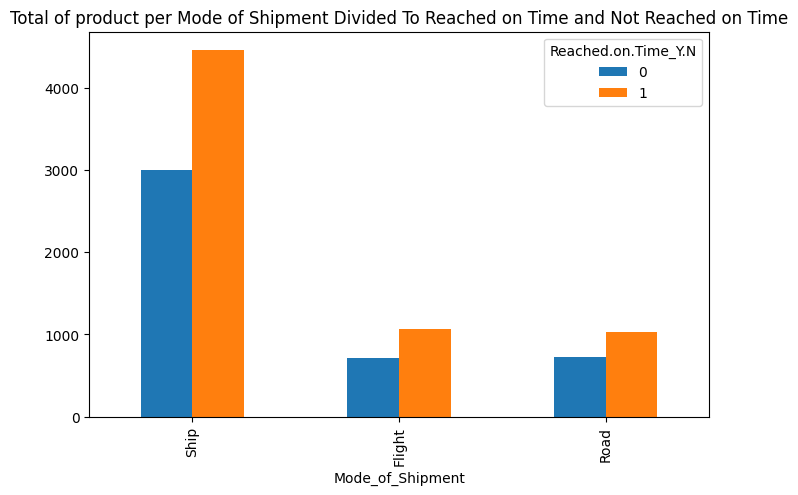

In [15]:
df_ct1.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product per Mode of Shipment Divided To Reached on Time and Not Reached on Time')
plt.show()

The most frequent mode of transport that used is Ship

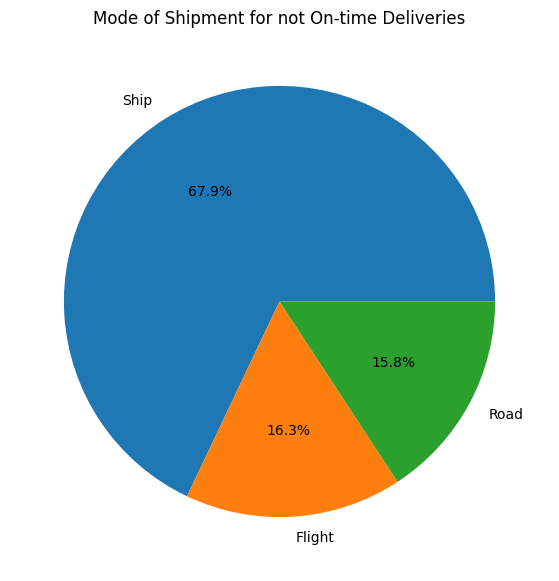

In [16]:
# Filter the DataFrame to only include rows where 'Reached.on.Time_Y.N' equals 1
df_filtered = df[df['Reached.on.Time_Y.N'] == 1]

# Now get the value counts of 'Mode_of_Shipment' in this filtered DataFrame
shipment_counts = df_filtered['Mode_of_Shipment'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(df_filtered['Mode_of_Shipment'].value_counts(), labels=shipment_counts.index, autopct='%1.1f%%')
plt.title('Mode of Shipment for not On-time Deliveries')
plt.show()

The highest percentage for not in time for each mode of shipment is by Ship by 67.9%, Flight 16.3%, Road 15.8%.

Upon analyzing the two graphs above, it can be concluded that the shipping method is often late compared to other modes of shipment. The shipping method is notably the most widely used method for shipment. To address this issue, the most effective alternative could be road transport, as it shows the lowest percentage of late deliveries. However, the road method has its limitations, especially when the shipment needs to pass over a body of water, making this method quite challenging. 

The second option is air transport, which, although potentially expensive, has a comparatively lower percentage of late deliveries and could therefore be considered a viable alternative. The last option is shipping, which is capable of traversing seas and is more cost-effective than air transport; however, it has a significantly higher percentage of late deliveries. 

In order to improve this situation, several recommendations could be considered when using shipping as the transport option:

* Implement a buffer in the Estimated Time of Arrival (ETA) to prevent late deliveries.
* Consider engaging with a Third Party Logistics (3PL) provider known for on-time deliveries.
* Implement real-time tracking systems to monitor the progress of shipments will make the delivery process easier to identify and address any delays as soon as they occur.
* Use advanced routing software to find the most efficient routes. This can help to reduce transit times and increase the likelihood of on-time delivery. Consider factors like traffic, road conditions, and weather.

## Prior Purchases

When an order is placed multiple times, the driver becomes familiar with the customer's location, which can potentially expedite the delivery process and positively impact the "Reached on Time" metric. In this analysis, we will validate whether this hypothesis holds true.

In [17]:
df_ct5=pd.crosstab(df['Prior_purchases'],df['Reached.on.Time_Y.N'])
df_ct5['Total']=df_ct5.sum(axis=1)
df_ct5.sort_values(1,ascending=False)

Reached.on.Time_Y.N,0,1,Total
Prior_purchases,,,
3,1421,2534,3955
2,974,1625,2599
4,984,1171,2155
5,645,642,1287
6,247,314,561
10,76,102,178
7,44,92,136
8,45,83,128


In [18]:
chi2, p, dof, expected = chi2_contingency(df_ct5)


if p <= 0.05:
    print("There is a significant relationship between Prior Purchases and Reached on Time.") # Ha
else:
    print("There is no significant relationship between Prior Purchases and Reached on Time.") # H0

print("Chi-square statistic:", chi2)
print("p-value:", p)

There is a significant relationship between Prior Purchases and Reached on Time.
Chi-square statistic: 125.92207081942591
p-value: 4.327024591861862e-20


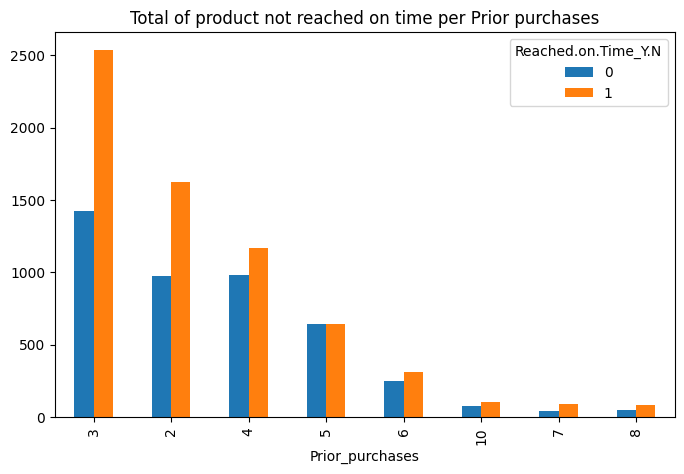

In [19]:
df_ct5.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product not reached on time per Prior purchases')
plt.show()

From the graph and the chi-square test above, it can be concluded that orders with three prior purchases have the highest incidence of not being delivered on time. Moreover, the rate of late deliveries decreases as the number of prior purchases increases. The chi-square test also confirms a significant relationship between the number of prior purchases and the "Reached on Time" metric.

## Warehouse Block

Efficient loading and unloading processes can significantly minimize delays at the warehouse, leading to quicker turnaround times. Providing staff training and equipping them with appropriate tools can prove highly beneficial. Warehouses often have several procedures in place - such as sorting, picking, and loading - that could potentially impede the shipping process. In this analysis, we will identify the warehouse with the highest distribution of "Not Reached On Time" statuses.

In [20]:
df_ct=pd.crosstab(df['Warehouse_block'],df['Reached.on.Time_Y.N'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values(1,ascending=False)

Reached.on.Time_Y.N,0,1,Total
Warehouse_block,,,
F,1472,2194,3666
B,729,1104,1833
D,738,1096,1834
C,739,1094,1833
A,758,1075,1833


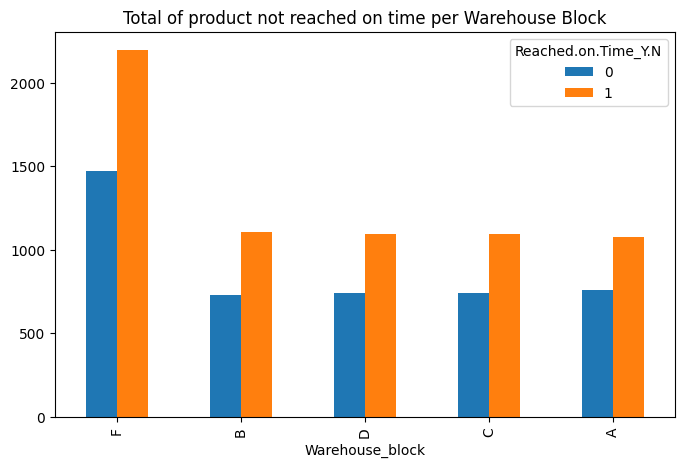

In [21]:
df_ct.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product not reached on time per Warehouse Block')
plt.show()

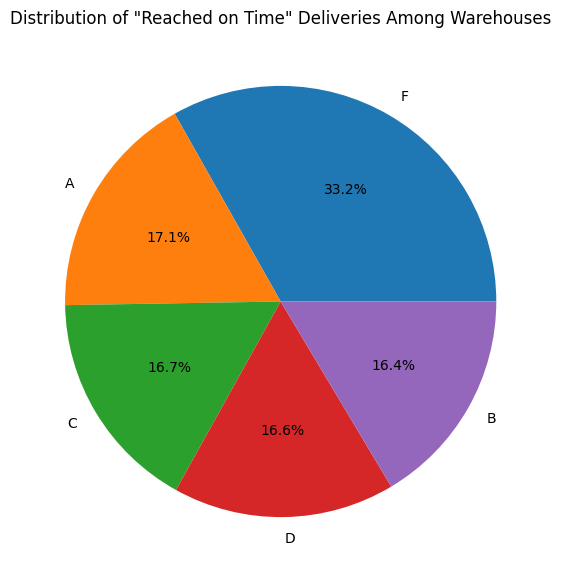

In [22]:
# Filter DataFrame for "Not Reached on Time" instances
df_not_on_time = df[df['Reached.on.Time_Y.N'] == 0]

# Get the counts for each warehouse
warehouse_counts = df_not_on_time['Warehouse_block'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(warehouse_counts, labels=warehouse_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Reached on Time" Deliveries Among Warehouses')
plt.show()


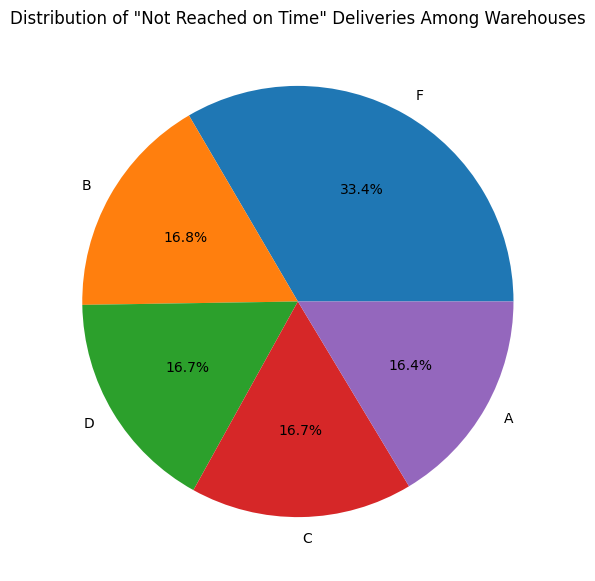

In [23]:
# Filter DataFrame for "Not Reached on Time" instances
df_not_on_time = df[df['Reached.on.Time_Y.N'] == 1]

# Get the counts for each warehouse
warehouse_counts = df_not_on_time['Warehouse_block'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(warehouse_counts, labels=warehouse_counts.index, autopct='%1.1f%%')
plt.title('Distribution of "Not Reached on Time" Deliveries Among Warehouses')
plt.show()


Upon examining the bar graph above, we observe that warehouse F stands out as the primary contributor to deliveries that did not reach on time. This could lead to the initial conclusion that warehouse F is the least efficient among all the warehouses. However, upon closer inspection, we find that warehouse F's performance is not the most subpar. 

Consider warehouse B, for example: it only contributes to 16.4% of on-time deliveries, whereas its contribution to late deliveries is slightly higher at 16.8%. The only warehouse that has a "surplus" - defined as a higher percentage contribution to on-time deliveries than to late deliveries - is warehouse A. It contributes to 17.1% of on-time deliveries, and only 16.4% of late deliveries.

To address the inefficiencies in the warehouses that do not have an on-time delivery surplus, a few measures can be taken. The transport manager could consider increasing loading space to allow for more efficient product loading onto vehicles. In addition, the location of the warehouse itself can significantly impact delivery times. For instance, if a warehouse is located in a less accessible area, it can delay deliveries. Therefore, gathering feedback from the drivers about warehouse locations could provide valuable insights for improving delivery efficiency.

## Customer Rating

If the delivery arrives on time, customers generally express satisfaction with the service. Conversely, if the delivery is late, customers often report feeling disappointed. Therefore, we can presume there is a relationship between customer ratings and on-time delivery. This relationship will be further examined in the analysis below.

In [24]:
df_ct3=pd.crosstab(df['Customer_rating'],df['Reached.on.Time_Y.N'])
df_ct3['Total']=df_ct3.sum(axis=1)
df_ct3.sort_values(0, ascending=False)

Reached.on.Time_Y.N,0,1,Total
Customer_rating,,,
1,922,1313,2235
2,892,1273,2165
4,886,1303,2189
3,882,1357,2239
5,854,1317,2171


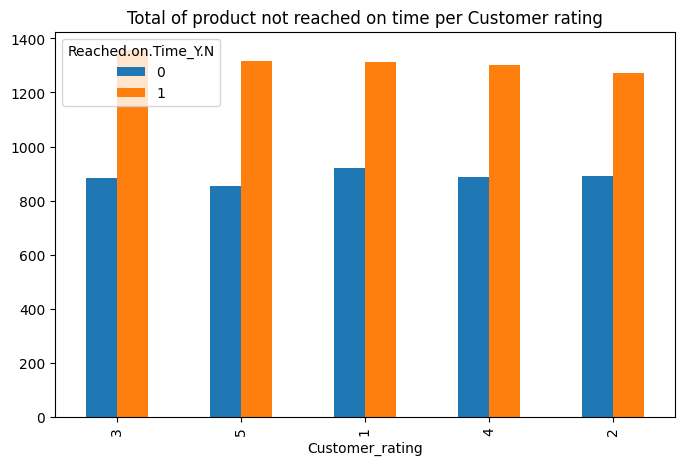

In [25]:
df_ct3.sort_values(1,ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Total of product not reached on time per Customer rating')
plt.show()

Products with a customer rating of 1, indicative of the lowest customer satisfaction, oddly exhibit the most instances of 'reached on time' or value of '0'. On the other hand, products with a rating of 5, reflecting the highest customer satisfaction, record the fewest instances of 'reached on time'. This suggests that a high customer rating does not merely represent timely delivery but implies an overall customer satisfaction with the service.

In the delivery process, several factors could affect the customer rating, even when the delivery was made on time, including:

* The delivery arrived on schedule, but the quantity of the product sent was not complete.
* The product was damaged during the delivery process.
* The product delivered differed from the customer's original request.
* The product received was not up to the quality standard expected by the customer.
* Lack of proper updates or tracking information provided during the shipping process.

# Conclusions

* Every mode of shipment comes with unique challenges, hence, a well-thought-out shipment plan is crucial to meet the promised ETA.
* Regular orders are advantageous for shipments as familiarity with the area increases the driver's chances of successful on-time deliveries.
* Each warehouse might face unique challenges, like Warehouse F dealing with a large volume of products. Despite being part of the warehousing, not the transport sector, such challenges can impact on-time delivery rates. Hence, process improvement within the warehouse is essential.
* While customer rating might not reflect the entire end-to-end process, a mishap in any part, such as a mistake during the picking process, can lead to customer dissatisfaction. This might result in poor customer ratings, even if the delivery was on time.

# Recommendations

* Incorporate buffer time into the Estimated Time of Arrival (ETA) to mitigate the risks of late deliveries.
* Engage with a Third Party Logistics (3PL) provider that is recognized for timely deliveries.
* Adopt real-time tracking systems for the transport team to oversee shipment progress. This will help identify and address any potential delays promptly.
* Utilize advanced routing software to determine the most efficient routes, factoring in variables such as traffic, road conditions, and weather. This could help reduce transit times and increase the likelihood of on-time delivery.
* Where feasible, retain the same driver or the same 3PL for repeat customers. This ensures familiarity with the customer's location and potentially speeds up the delivery process.
* Strive to maintain a "surplus" percentage in each warehouse block to prevent potential shortfalls.
* Encourage Warehouse A to share its loading method and area layout plans with the other warehouses. Regular comparisons could foster improvements across all locations.
* Implement a tracking system that allows customers to monitor the delivery process. This transparency can enhance customer satisfaction and operational efficiency.